# Solving Laplace equation using Gauss-seidel iterative method 

$$( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} )= 0$$

In [36]:
import numpy as np 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation
%matplotlib notebook

In [37]:
# defining variables 
Nx = 40        # Number of nodes in the x direction 
Ny = 40        # Number of nodes in the y direction 
tol = 1e-1     # tolerance 
err = 1        # error
k = 0          # iteration counter

In [38]:
# Diricklet boundry conditions
Uy0 = 200*np.ones((1,Nx)) # Boundry condition at y=0 # lower boundry
UNy = 200*np.ones((1,Nx)) # Boundry condition at y=Ny # Upper boundary
Ux0 = 200*np.ones(Ny) # Boundry condition at x=0 # left boundry 
UNx = 200*np.ones(Ny) # Boundry condition at x=Nx # Right boundary 
# initial the whole matrix: the value at the interior nodes 
U = np.zeros((Ny,Nx))*25
#Adding boundry conditions to the matrix 
U[0] = UNy
U[Ny-1] = Uy0
U[:,Nx-1] = UNx
U[:,0]= Ux0

In [39]:
# Iterate Gauss seidel method  
UFK=[]
UFK.append(U.copy())
NFK=[]
UF=U.copy()
while True:
    k=k+1 
    for i in range (1,Nx-1):
        for j in range (1,Ny-1):
            UF[j,i] = (UF[j+1,i]+UF[j,i+1]+UF[j-1,i]+UF[j,i-1])*0.25 #the matrix i want to store after each iteration 
    UFK.append(UF.copy())
    H = UFK[-1]-UFK[-2]
    N = np.linalg.norm(H)
    NFK.append(N)
    if N <= tol:
        break

In [40]:
def data(t):
    L = UFK[t]
    ax.clear()
    surf = ax.plot_surface(XX, YY, L, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim([-50,200])
    cset = ax.contour(XX, YY, L, zdir='z', offset=-50, cmap=cm.coolwarm)
    cset = ax.contour(XX, YY, L, zdir='x', offset=0, cmap=cm.coolwarm)
    cset = ax.contour(XX, YY, L, zdir='y', offset=40, cmap=cm.coolwarm)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.set_xlabel('X nodes - Axis')
    ax.set_ylabel('Y nodes - Axis')
    ax.set_zlabel('Value')
    return surf

<IPython.core.display.Javascript object>


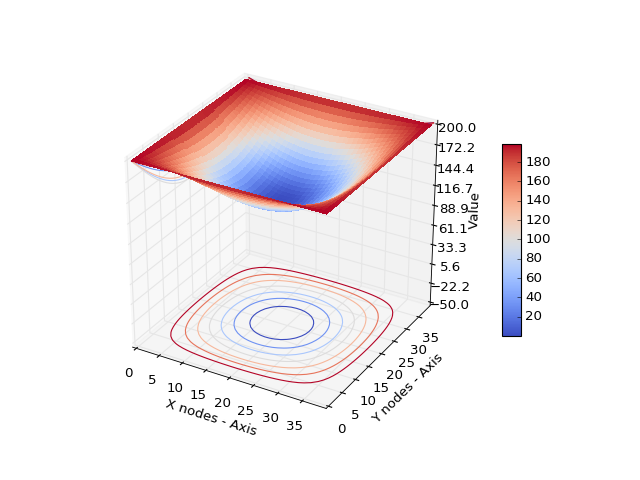

In [41]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0, Nx)
Y = np.arange(0, Ny)
XX,YY = np.meshgrid(X, Y)
surf = ax.plot_surface(XX, YY, UFK[20],rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-50, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('X nodes - Axis')
ax.set_ylabel('Y nodes - Axis')
ax.set_zlabel('Value')

cset = ax.contour(XX, YY, UFK[20], zdir='z', offset=-50, cmap=cm.coolwarm)
cset = ax.contour(XX, YY, UFK[20], zdir='x', offset=0, cmap=cm.coolwarm)
cset = ax.contour(XX, YY, UFK[20], zdir='y', offset=40, cmap=cm.coolwarm)


ani = animation.FuncAnimation(fig, data,np.arange(20, len(UFK), 1), interval=1, repeat=True )
plt.show()